### Loading libraries

In [67]:
%%time
import pandas as pd



Wall time: 0 ns


#### Reading test and train data

In [37]:
%%time

df = pd.read_csv('train.csv')


# df_test = pd.read_csv('test.csv')


Wall time: 190 ms


#### Displaying head of training and testing

In [38]:
print(df.head(3))
# print(df_test.head(3))

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14


#### Define column date as datatype date and define new date features

In [39]:
# Define column date as datatype date and define new date features
def add_new_features(x):
    x['date'] = pd.to_datetime(x['date'])
    x['year'] = x.date.dt.year
    x['month'] = x.date.dt.month
    x['dayofweek'] = x.date.dt.dayofweek
    return x

#### Dropping date column

In [40]:
df = add_new_features(df)
# df_test= add_new_features(df_test)


In [41]:
df

,date,store,item,sales,year,month,dayofweek
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017,12,2
912996,2017-12-28,10,50,59,2017,12,3
912997,2017-12-29,10,50,74,2017,12,4
912998,2017-12-30,10,50,62,2017,12,5


### Add new features daily aveage sales and monthly average sales

In [42]:
df['daily_avg']=df.groupby(['item','store','dayofweek'])['sales'].transform('mean')
df['monthly_avg']=df.groupby(['item','store','month'])['sales'].transform('mean')

In [43]:
daily_avg=df.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
monthly_avg=df.groupby(['item','store','month'])['sales'].mean().reset_index()


In [44]:
monthly_avg

,item,store,month,sales
0,1,1,1,13.709677
1,1,1,2,14.631206
2,1,1,3,17.600000
3,1,1,4,20.786667
4,1,1,5,22.245161
...,...,...,...,...
5995,50,10,8,84.567742
5996,50,10,9,78.873333
5997,50,10,10,73.045161
5998,50,10,11,76.993333


### Merging new features

In [45]:
def merge(x,y,col,col_name):
    x =pd.merge(x, y, how='left', on=None, left_on=col, right_on=col,
            left_index=False, right_index=False, sort=True,
             copy=True, indicator=False,validate=None)
    
    x=x.rename(columns={'sales':col_name})
    return x

# df_test=merge(df_test, daily_avg,['item','store','dayofweek'],'daily_avg')
# df_test=merge(df_test, monthly_avg,['item','store','month'],'monthly_avg')


#### Displaying columns in train and testing 

In [46]:
# print(df_test.columns)
print(df.columns)

Index(['date', 'store', 'item', 'sales', 'year', 'month', 'dayofweek',
       'daily_avg', 'monthly_avg'],
      dtype='object')


#### Dropping columns

In [47]:

# df_test=df_test.drop(['id'],axis=1)
df=df.drop(['date'],axis=1)
# df_test=df_test.drop(['date'],axis=1)

In [48]:
# df_test.columns

#### INPUT size

In [49]:
df.shape

(913000, 8)

In [50]:
# df_test.shape

In [51]:
df.head(2)

,store,item,sales,year,month,dayofweek,daily_avg,monthly_avg
0,1,1,13,2013,1,1,18.168582,13.709677
1,1,1,11,2013,1,2,18.793103,13.709677


In [52]:
# df_test.head(2)

### Checking for missing  values

In [53]:
df.isnull().sum()

store          0
item           0
sales          0
year           0
month          0
dayofweek      0
daily_avg      0
monthly_avg    0
dtype: int64

In [54]:
# df_test.isnull().sum()

### Checking datatypes

In [55]:
df.dtypes

store            int64
item             int64
sales            int64
year             int64
month            int64
dayofweek        int64
daily_avg      float64
monthly_avg    float64
dtype: object

In [56]:
# df_test.dtypes

### Modelling  

In [57]:
y=pd.DataFrame()
y=df['sales']


In [58]:
# df_test.head(2)

In [59]:
df.head()

,store,item,sales,year,month,dayofweek,daily_avg,monthly_avg
0,1,1,13,2013,1,1,18.168582,13.709677
1,1,1,11,2013,1,2,18.793103,13.709677
2,1,1,14,2013,1,3,19.452107,13.709677
3,1,1,13,2013,1,4,21.015326,13.709677
4,1,1,10,2013,1,5,22.973180,13.709677


In [60]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('sales',axis=1),df.pop('sales'),random_state=123,test_size=0.2)

In [62]:
# def XGBmodel(x_train,x_test,y_train,y_test):
#     matrix_train = xgb.DMatrix(x_train,label=y_train)
#     matrix_test = xgb.DMatrix(x_test,label=y_test)
#     model=xgb.train(params={'objective':'reg:linear','eval_metric':'mae'}
#                     ,dtrain=matrix_train,num_boost_round=500, 
#                     early_stopping_rounds=20,evals=[(matrix_test,'test')],)
#     return model

# model=XGBmodel(x_train,x_test,y_train,y_test)

[19:19:21] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-mae:36.30514
[1]	test-mae:25.43607
[2]	test-mae:17.89877
[3]	test-mae:12.81908
[4]	test-mae:9.59589
[5]	test-mae:7.71342
[6]	test-mae:6.68569
[7]	test-mae:6.14731
[8]	test-mae:5.87610
[9]	test-mae:5.74032
[10]	test-mae:5.67088
[11]	test-mae:5.63592
[12]	test-mae:5.61763
[13]	test-mae:5.60841
[14]	test-mae:5.60201
[15]	test-mae:5.59881
[16]	test-mae:5.59624
[17]	test-mae:5.59331
[18]	test-mae:5.59243
[19]	test-mae:5.59148
[20]	test-mae:5.59050
[21]	test-mae:5.58969
[22]	test-mae:5.58963
[23]	test-mae:5.58932
[24]	test-mae:5.58861
[25]	test-mae:5.58767
[26]	test-mae:5.58743
[27]	test-mae:5.58648
[28]	test-mae:5.58630
[29]	test-mae:5.58638
[30]	test-mae:5.58628
[31]	test-mae:5.58616
[32]	test-mae:5.58602
[33]	test-mae:5.58533
[34]	test-mae:5.58534
[35]	test-mae:5.58516
[36]	test-mae:5.58486
[37]	test-mae:5.58457
[38]	test-mae:5

%%time
train_data = lgb.Dataset(x,y)
model =lgb.train(param,train_data,)

%%time
output=model.predict(df_test)
result=pd.DataFrame(output)
result

### Submission

In [63]:
# df_test

In [64]:
# df_test1 = pd.read_csv('test.csv')
# submission = pd.DataFrame(df_test1.pop('id'))
# y_pred = model.predict(xgb.DMatrix(df_test), ntree_limit = model.best_ntree_limit)

# submission['sales']= y_pred

# submission.to_csv('submission.csv',index=False)

In [65]:
# submission.tail()

,id,sales
44995,44995,86.102005
44996,44996,88.389984
44997,44997,88.389984
44998,44998,88.389984
44999,44999,88.389984


In [66]:
# y_pred

array([11.905192, 11.905192, 11.905192, ..., 88.389984, 88.389984,
       88.389984], dtype=float32)

In [105]:
dtrain = xgb.DMatrix(data=x_train, enable_categorical=True, label=y_train)

params = {'objective':'reg:linear',
            'max_depth':2,
            'eta':0.2,
            'silent':1,
            'subsample':1}
num_rounds = 500

xg_depth_20 = xgb.train(params=params, dtrain=dtrain,num_boost_round=num_rounds)

[19:39:01] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:01] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [107]:
import matplotlib.pyplot as plt

In [106]:
dtest = xgb.DMatrix(data=x_test)

train_pred = xg_depth_20.predict(dtest)
print(train_pred)

[97.74126   39.829147  17.153366  ... 24.339748  28.254974  13.4782095]


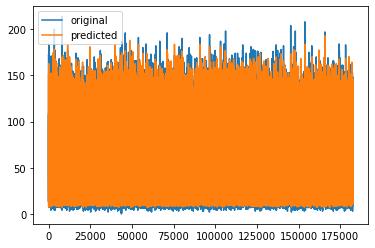

In [108]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, train_pred, label="predicted")
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error as mae , mean_squared_error as mse

mae(y_test, train_pred)

5.591327473850919

In [110]:
mse(y_test, train_pred)

52.77167957511321

In [111]:
dtrain = xgb.DMatrix(data=x_train, enable_categorical=True, label=y_train)

params = {'objective':'reg:linear',
            'max_depth':3,
            'eta':0.2,
            'silent':1,
            'subsample':1}
num_rounds = 500

xg_depth_20 = xgb.train(params=params, dtrain=dtrain,num_boost_round=num_rounds)

[19:39:41] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:41] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [112]:
dtest = xgb.DMatrix(data=x_test)

train_pred = xg_depth_20.predict(dtest)
print(train_pred)

[97.7815   40.35874  16.55061  ... 23.902283 29.433537 15.060129]


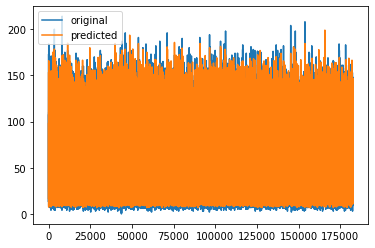

In [113]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, train_pred, label="predicted")
plt.legend()
plt.show()

In [114]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, train_pred)

5.572671665455921

In [115]:
mse(y_test, train_pred)

52.432389478490904